In [1]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

# Load the dataset
df = pd.read_csv("reddit_ai_comments_with_sentiment_Full.csv")
df["Comment"] = df["Comment"].astype(str)

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation & numbers
    words = word_tokenize(text)
    words = [w for w in words if w not in stopwords.words("english")]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

df["cleaned_comments"] = df["Comment"].apply(preprocess_text)

print(df["cleaned_comments"].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasistha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasistha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vasistha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    nvidias decline double market cap cocacola che...
1    im machine learning engineer since argument co...
2    even though likely giant overreaction losing m...
3    freakout people worried demand best chip going...
4    deepseek isnt competitor nvidia still need nvi...
Name: cleaned_comments, dtype: object


In [5]:
df.to_csv("reddit_ai_comments_with_sentiment_Full.csv")

In [2]:
%pip install bertopic

  Using cached umap_learn-0.5.7-py3-none-any.whl.metadata (21 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
   ---------------------------------------- 0.0/814.0 kB ? eta -:--:--
   --------------------------------------- 814.0/814.0 kB 17.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ------------------------------- -------- 11.5/14.8 MB 55.5 MB/s eta 0:00:01
   ---------------------------------------- 14.8/14.8 MB 46.6 MB/s eta 0:00:00
Using cached umap_learn-0.5.7-py3-none-any.whl (88 kB)
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 38.1 MB/s eta 0:00:00
Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   ----------------- ---------------------- 12.3/28.1 MB 59.4 MB/s eta 0:00:01
   ----------------------------------- ---- 25.2/28.1 MB 59.0 MB/s eta 0:00:01


In [ ]:
from bertopic import BERTopic
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

df = pd.read_csv("reddit_ai_comments_with_sentiment_Full.csv")

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df["cleaned_comments"])

df["Topic"] = topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,26810,-1_model_claude_llm_ai,"[model, claude, llm, ai, like, use, get, peopl...",[thank sharing experience claude im really sor...
1,0,2351,0_gemini_flash_google_advanced,"[gemini, flash, google, advanced, pro, experim...","[gemini, gemini, gemini]"
2,1,736,1_therapist_therapy_doctor_health,"[therapist, therapy, doctor, health, helped, m...",[retired therapist tested thoroughly think bet...
3,2,597,2_china_chinese_government_deepseek,"[china, chinese, government, deepseek, tiananm...",[chinese government deepseek china socialist s...
4,3,578,3_student_teacher_assignment_professor,"[student, teacher, assignment, professor, scho...",[okay article seems like bullshit least high s...
...,...,...,...,...,...
477,476,10,476_emphatically_presumptuous_gpu_he,"[emphatically, presumptuous, gpu, he, gamers, ...",[gpu even le gamers cpu best best instability ...
478,477,10,477_tag_offtopic_permitted_cooperation,"[tag, offtopic, permitted, cooperation, pun, s...",[attention serious tag notice joke pun offtopi...
479,478,10,478_raters_provenance_derped_recentlyhttpsnzne...,"[raters, provenance, derped, recentlyhttpsnzne...",[openai get data certainly didnt originate tri...
480,479,10,479_reinventing_army_parsing_buzzword,"[reinventing, army, parsing, buzzword, wheel, ...",[im dealing rn machine learning army sometimes...


In [3]:
topic_info = topic_model.get_topic_info()

#print(topic_info.head())
print(topic_info["Representation"][:10])

print(topic_info.head())

0    [model, claude, llm, ai, like, use, get, peopl...
1    [gemini, flash, google, advanced, pro, experim...
2    [therapist, therapy, doctor, health, helped, m...
3    [china, chinese, government, deepseek, tiananm...
4    [student, teacher, assignment, professor, scho...
5    [chat, gpt, uncle, gpts, asked, conversation, ...
6    [deepseek, chip, nvidia, gpus, deepseeks, gpu,...
7    [bubble, ai, industry, hype, company, tech, in...
8    [openai, openais, omini, opreview, name, kiwi,...
9    [llm, mayor, township, gloucester, magic, nj, ...
Name: Representation, dtype: object
   Topic  Count                                    Name  \
0     -1  26810                  -1_model_claude_llm_ai   
1      0   2351          0_gemini_flash_google_advanced   
2      1    736       1_therapist_therapy_doctor_health   
3      2    597     2_china_chinese_government_deepseek   
4      3    578  3_student_teacher_assignment_professor   

                                      Representation  \
0  

In [4]:
print(df["Topic"].head())
print(len(df["Topic"]))

0    78
1     6
2    78
3    -1
4     5
Name: Topic, dtype: int64
54165


In [5]:
topic_representation_dict = dict(zip(topic_info["Topic"], topic_info["Representation"]))


In [6]:
df["Topic Representation"] = df["Topic"].map(topic_representation_dict)

In [7]:
print(df["Topic Representation"].head())

0    [cap, market, trillion, liquidity, billion, nv...
1    [bubble, ai, industry, hype, company, tech, in...
2    [cap, market, trillion, liquidity, billion, nv...
3    [model, claude, llm, ai, like, use, get, peopl...
4    [deepseek, chip, nvidia, gpus, deepseeks, gpu,...
Name: Topic Representation, dtype: object


In [8]:
df.to_csv("reddit_ai_comments_with_sentiment_Full.csv")

print("saved successfully")

saved successfully


In [9]:
topic_model.save("bertopic_model")

2025-04-17 23:00:16,729 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.
c:\Users\vasistha\anaconda3\envs\textmining\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



## Code to do topic modeling on test dataset

In [10]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

# Load the dataset
df = pd.read_csv("TestDataset/reddit_ai_comments_with_sentiment_Test.csv")
df["Comment"] = df["Comment"].astype(str)

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation & numbers
    words = word_tokenize(text)
    words = [w for w in words if w not in stopwords.words("english")]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

df["cleaned_comments"] = df["Comment"].apply(preprocess_text)

print(df["cleaned_comments"].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasistha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasistha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vasistha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    mean nvidia h chip sitting around cant sell la...
1    nvidia spend time producing selling consumer g...
2    nvidia wont lose cent pay gpu nvidias customer...
3    dont worry hour day tweet change always presid...
4    dont worry hour day tweet change always presid...
Name: cleaned_comments, dtype: object


In [11]:
df.to_csv("TestDataset/reddit_ai_comments_with_sentiment_Test.csv")

In [12]:
from bertopic import BERTopic
topic_model = BERTopic.load("bertopic_model")


In [13]:
topics, probs = topic_model.fit_transform(df["cleaned_comments"])

df["Topic"] = topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,507,-1_ai_llm_model_like,"[ai, llm, model, like, chatgpt, one, people, u...",[also dont scientific definition consciousness...
1,0,497,0_nvidia_stock_market_chip,"[nvidia, stock, market, chip, company, gpus, g...",[thinking nvidia sincerely dont mean chastise ...
2,1,135,1_chatgpt_asked_ask_used,"[chatgpt, asked, ask, used, someone, asking, y...","[chatgpt, chatgpt, chatgpt]"
3,2,71,2_gpt_chat_gpts_pretrained,"[gpt, chat, gpts, pretrained, im, conversation...","[gpt, chat gpt, chat gpt]"
4,3,67,3_llm_lying_know_arent,"[llm, lying, know, arent, lie, dont, dumb, rea...","[llm large lying model, wrong isnt thing delib..."
5,4,46,4_tariff_trade_deficit_country,"[tariff, trade, deficit, country, trump, asked...",[gpt fact check stats said tariff v trade barr...
6,5,41,5_ai_think_like_people,"[ai, think, like, people, brain, know, comment...",[think natural language insufficient tool expr...
7,6,40,6_art_work_artist_copyright,"[art, work, artist, copyright, copyrighted, ai...",[drawing people tell art art human art llm tha...
8,7,30,7_llm_response_reasoning_prompt,"[llm, response, reasoning, prompt, comprehensi...",[reasoning thinking model last couple month ba...
9,8,27,8_gemini_google_use_circle,"[gemini, google, use, circle, behind, android,...","[whats gemini, gemini better chatgpt, present ..."


In [14]:
topic_info = topic_model.get_topic_info()

#print(topic_info.head())
print(topic_info["Representation"][:10])

print(topic_info.head())

0    [ai, llm, model, like, chatgpt, one, people, u...
1    [nvidia, stock, market, chip, company, gpus, g...
2    [chatgpt, asked, ask, used, someone, asking, y...
3    [gpt, chat, gpts, pretrained, im, conversation...
4    [llm, lying, know, arent, lie, dont, dumb, rea...
5    [tariff, trade, deficit, country, trump, asked...
6    [ai, think, like, people, brain, know, comment...
7    [art, work, artist, copyright, copyrighted, ai...
8    [llm, response, reasoning, prompt, comprehensi...
9    [gemini, google, use, circle, behind, android,...
Name: Representation, dtype: object
   Topic  Count                        Name  \
0     -1    507        -1_ai_llm_model_like   
1      0    497  0_nvidia_stock_market_chip   
2      1    135    1_chatgpt_asked_ask_used   
3      2     71  2_gpt_chat_gpts_pretrained   
4      3     67      3_llm_lying_know_arent   

                                      Representation  \
0  [ai, llm, model, like, chatgpt, one, people, u...   
1  [nvidia, stock, 

In [15]:
topic_representation_dict = dict(zip(topic_info["Topic"], topic_info["Representation"]))


In [17]:
df["Topic Representation"] = df["Topic"].map(topic_representation_dict)

In [18]:
print(df["Topic Representation"].head())

0    [nvidia, stock, market, chip, company, gpus, g...
1    [nvidia, stock, market, chip, company, gpus, g...
2    [nvidia, stock, market, chip, company, gpus, g...
3    [nvidia, stock, market, chip, company, gpus, g...
4    [nvidia, stock, market, chip, company, gpus, g...
Name: Topic Representation, dtype: object


In [19]:
df.to_csv("TestDataset/reddit_ai_comments_with_sentiment_Test.csv")

print("saved successfully")

saved successfully


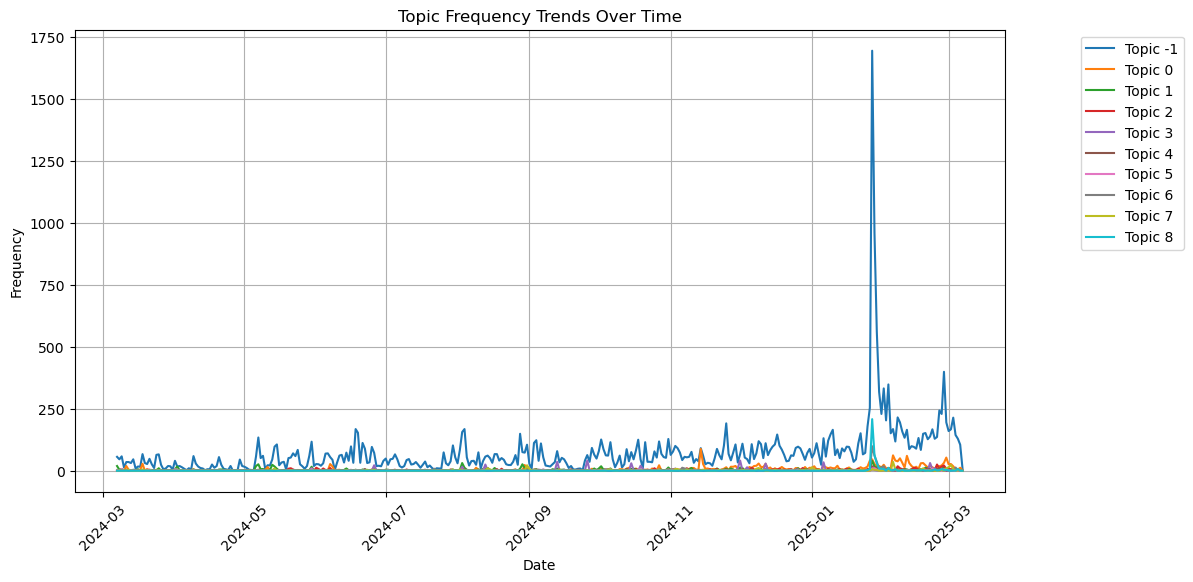

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated dataset with topics
df = pd.read_csv("reddit_ai_comments_with_sentiment_Full.csv")

# Convert 'Timestamp' column to datetime format if not already done
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df.dropna(subset=["Timestamp"], inplace=True)

# Extract date for daily aggregation
df["Date"] = df["Timestamp"].dt.date

# Count topic frequency per day
topic_trends = df.groupby(["Date", "Topic"]).size().unstack(fill_value=0)


# Plot topic frequency trends
plt.figure(figsize=(12, 6))
for topic in topic_trends.columns[:10]:
    plt.plot(topic_trends.index, topic_trends[topic], label=f"Topic {topic}")

plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Topic Frequency Trends Over Time")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
